# Kohnen Self Organising Network 

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

##### Below Code generates the data and store it in the variable patterns. 
1500 two-dimensional input vectors generated randomly in a square region in the interval (-1, 1)

initial synaptic weights randomly in the same interval (-1 and +1 )

In [2]:
Data = np.array([1500, 2])
Network = np.array([10, 10])
patterns = np.random.uniform(-1, 1, (Data[0], Data[1]))

patterns = np.asarray(patterns,dtype=np.float32)

Below Code initialises a Kohonen network with 100 neurons arranged in the form of a two-
dimensional lattice with 10 rows and 10 columns.

And a scatter plot of initialised weight matrix is shown below.

*** INITIALISED KOHNEN NETWORK *** 


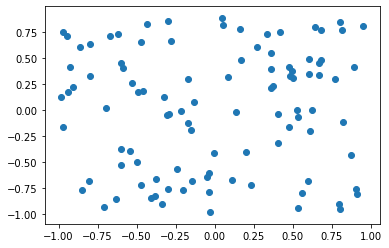

In [3]:
input_dimensions = 2

map_width = 10
map_height = 10
MAP = np.random.uniform(-1, 1, size=(map_height,map_width,input_dimensions))
MAP_final = MAP

x = []
y = []
for row in MAP:
    for pair in row:
        x.append(pair[0])
        y.append(pair[1])
        
print("*** INITIALISED KOHNEN NETWORK *** ")
plt.scatter(x, y)
plt.show()

prev_MAP = np.zeros((map_height,map_width,input_dimensions))

Defining required parameters.

In [4]:
radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

max_iterations = 1000 #Define maximum number of iterations to be 1000.
radius=radius0
learning_rate = learning_rate0

convergence = [1]

e=0.001 # End the iterations if diff between previous and current reaches this point.
flag=0 # To check if converged. 

Below is the code for training the network based on the self organising network algorithm. where a Best matchin Unit is found from every training sample and weights are updated.

Iteration NUMBER:  0
**************THE NETWORK AFTER  0 iterations**************


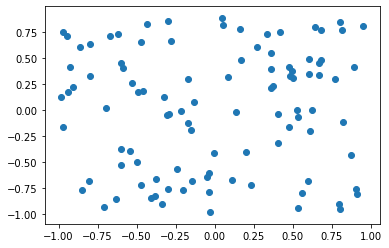

Iteration NUMBER:  20
Iteration NUMBER:  40
Iteration NUMBER:  60
Iteration NUMBER:  80
Iteration NUMBER:  100
**************THE NETWORK AFTER  100 iterations**************


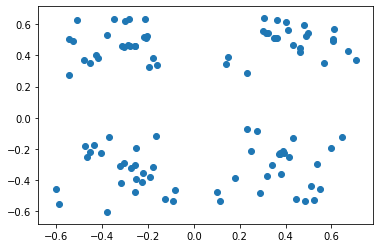

Iteration NUMBER:  120
Iteration NUMBER:  140
Iteration NUMBER:  160
Iteration NUMBER:  180
Iteration NUMBER:  200
**************THE NETWORK AFTER  200 iterations**************


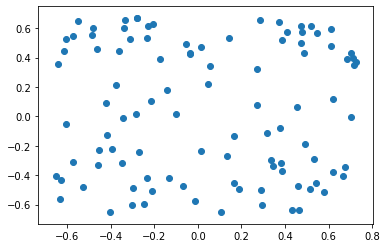

Iteration NUMBER:  220
Iteration NUMBER:  240
Iteration NUMBER:  260
Iteration NUMBER:  280
Iteration NUMBER:  300
**************THE NETWORK AFTER  300 iterations**************


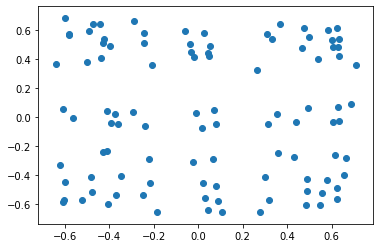

Iteration NUMBER:  320
Iteration NUMBER:  340
Iteration NUMBER:  360
Iteration NUMBER:  380
Iteration NUMBER:  400
**************THE NETWORK AFTER  400 iterations**************


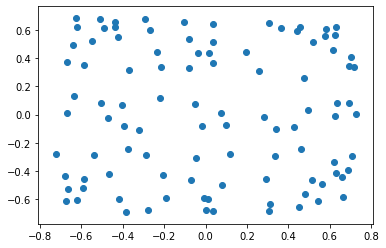

Iteration NUMBER:  420
Iteration NUMBER:  440
Iteration NUMBER:  460
Iteration NUMBER:  480
Iteration NUMBER:  500
**************THE NETWORK AFTER  500 iterations**************


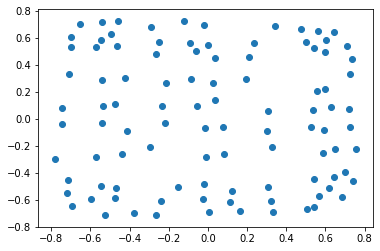

Iteration NUMBER:  520
Iteration NUMBER:  540
Iteration NUMBER:  560
Iteration NUMBER:  580
Iteration NUMBER:  600
**************THE NETWORK AFTER  600 iterations**************


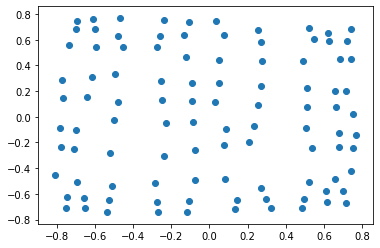

Iteration NUMBER:  620
Iteration NUMBER:  640
Iteration NUMBER:  660
Iteration NUMBER:  680
Iteration NUMBER:  700
**************THE NETWORK AFTER  700 iterations**************


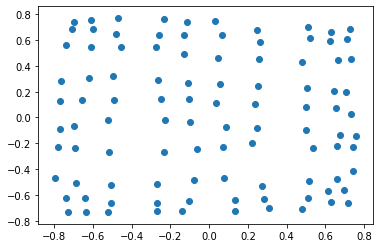

Iteration NUMBER:  720
Iteration NUMBER:  740
Iteration NUMBER:  760
Iteration NUMBER:  780
Iteration NUMBER:  800
**************THE NETWORK AFTER  800 iterations**************


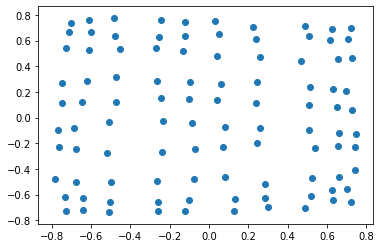

Iteration NUMBER:  820
Iteration NUMBER:  840
Iteration NUMBER:  860
Iteration NUMBER:  880
Iteration NUMBER:  900
**************THE NETWORK AFTER  900 iterations**************


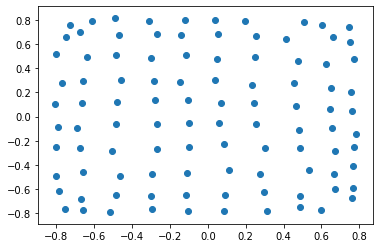

Iteration NUMBER:  920


In [5]:
for iteration in range(0, max_iterations):
    
    if(iteration%20 == 0 ):
        print("Iteration NUMBER: ", iteration)
    
    if(iteration%100 == 0 ):
        print("**************THE NETWORK AFTER ", iteration, "iterations**************")
        x = []
        y = []
        for row in MAP_final:
            for pair in row:
                x.append(pair[0])
                y.append(pair[1])
        
        plt.scatter(x, y)
        plt.show()
    
    for i in range(len(patterns)):
        
        # difference between current and previous map
        J = np.linalg.norm(MAP - prev_MAP)

        if  J <= e: #if converged
            flag=1
            break
            
        else:
            
            pattern = patterns[i]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            
            # Finding the best matching unit(BMU) which is the one with the smallest Euclidean distance
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
            # Here BMU now contains the nearest node details.
        
            prev_MAP = np.copy(MAP)
            
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(iteration/max_iterations))
            radius = radius0*math.exp(-iteration/max_iterations)
    
    if J < min(convergence):
        MAP_final = MAP
        
    convergence.append(J)
    
    if flag==1:
        break


###### Here Below is the plot of convergence with number of iterations

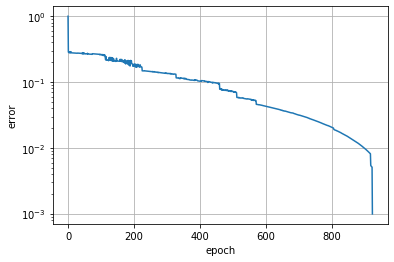

Final error: 0.000994221148908758


In [6]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Final error: ' + str(J))

### The Final Kohnen Network 

**************THE Final NETWORK**************


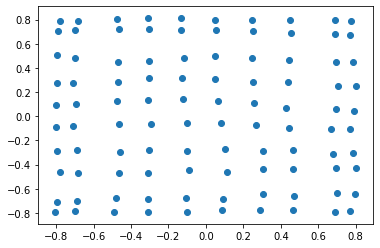

In [10]:
x = []
y = []
for row in MAP_final:
    for pair in row:
        x.append(pair[0])
        y.append(pair[1])
        
print("**************THE Final NETWORK**************")
plt.scatter(x, y)
plt.show()

In [8]:
test_inputs = np.array([[0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]])
print(test_inputs.shape)

(4, 2)


The network tested on given test inputs, we can see the node that is activated in red colour and it also justifies its position based on the input. 

[0.1 0.8]


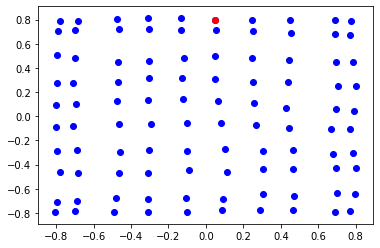

[ 0.5 -0.2]


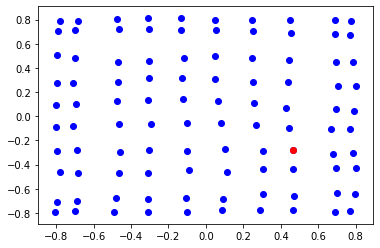

[-0.8 -0.9]


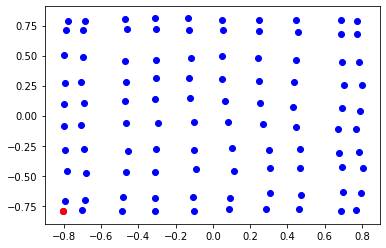

[-0.6  0.9]


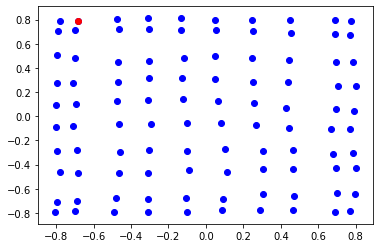

In [11]:
for i in range(len(test_inputs)):
    pattern = test_inputs[i]
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)

    # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    
    print(pattern)
#     print(MAP_final[BMU[0]][BMU[1]])
    x = []
    y = []
#     print(MAP_final.shape)
    for row in MAP_final:
        for pair in row:
            x.append(pair[0])
            y.append(pair[1])
        
    plt.scatter(x, y, c = 'b')
    plt.scatter(MAP_final[BMU[0]][BMU[1]][0], MAP_final[BMU[0]][BMU[1]][1], c='r')
    plt.show()
    